In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
%matplotlib inline

In [3]:
plt.style.use("ggplot")
np.random.seed(123)

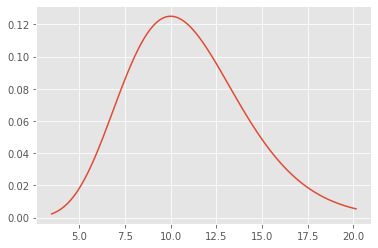

In [4]:
k = 11
lam = 1
x = np.linspace(gamma.ppf(0.001, k), gamma.ppf(0.99, k), 100)
plt.plot(x, gamma.pdf(x, k, scale=1/lam))

In [5]:
f = lambda x, lam, k : -lam + (k-1) / x

In [6]:
def leap_flog(q, p, eps, lam, k, f):
    p_new = p + 0.5 * eps * f(q, lam, k)
    q_new = q + eps * p_new
    p_new = p_new + 0.5 * eps * f(q_new, lam, k)
    q, p = q_new, p_new
    return q, p

<ipython-input-11-3b10dff04240>:25: RuntimeWarning: divide by zero encountered in log
  cs = plt.contour(X, Y, 0.5 * Y **2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])


accept ratio 1.0


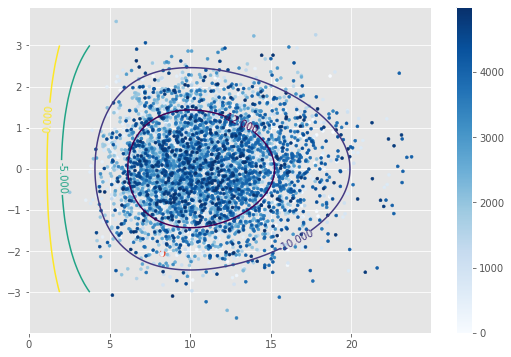

In [11]:
eps = 1e-2
q, p = 4.0, 0.0
L = 100#同一トラジェ区トリノ繊維回数
NMCS = 10000
warmup = 5000
lf_arr = np.zeros([NMCS, 2])
n_accept = 0

for mcs in range(NMCS):
    hamiltonian_c = 0.5 * p **2 + lam * q -(k-1) * np.log(q)
    q_c, p_c = q, p
    for i in range(L):
        q_c, p_c = leap_flog(q_c, p_c, eps, lam, k, f)
    hamiltonian_new = 0.5 * p_c **2 + lam * q_c -(k-1) * np.log(q_c)
    if np.random.rand() < np.exp(hamiltonian_c - hamiltonian_new):
        q, p = q_c, p_c
        hamiltonian_c = hamiltonian_new
        n_accept += 1
    lf_arr[mcs, :] = q, p
    p = norm.rvs()
df = pd.DataFrame(lf_arr[warmup:], columns=["q", "p"])
plt.figure(figsize = (9, 6))
x, y = np.linspace(0, 20, 100), np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
cs = plt.contour(X, Y, 0.5 * Y **2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(cs, inline=1, fontsize = 10)
plt.scatter(df["q"][0], df["p"][0])
plt.scatter(df["q"], df["p"], marker = ".", c = df.index, cmap="Blues")
plt.colorbar()
print("accept ratio", n_accept / NMCS)

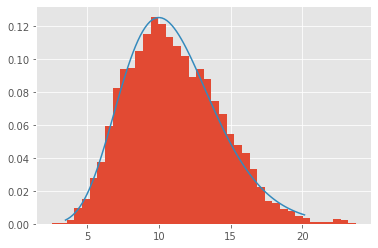

In [14]:
df["q"].hist(density=True, bins=40)
x = np.linspace(gamma.ppf(0.001, k), gamma.ppf(0.99, k), 100)
plt.plot(x, gamma.pdf(x, k, scale=1/lam))

In [15]:
hamiltonian_c

-9.94192486858272

In [16]:
hamiltonian_new

-9.94192486858272